In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformations for the training and test sets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training and test sets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [371]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class BigNet(nn.Module):
    def __init__(self):
        super(BigNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class CNNet(nn.Module):
    def __init__(self):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class SCNNet(nn.Module):
    def __init__(self):
        super(SCNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 50, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(50, 60, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(60 * 7 * 7, 110)
        self.fc2 = nn.Linear(110, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 60 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [199]:
def train(net, epochs=5, trainloader=trainloader):
    losses = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
    
            # Zero the parameter gradients
            optimizer.zero_grad()
    
            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            # Print statistics
            running_loss += loss.item()
            if i % 100 == 99:  # Print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 100:.3f}')
                losses.append(running_loss)
                running_loss = 0.0
    
    print('Finished Training')
    return losses

def test(net, testloader=testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


In [82]:
n = 10
nets = [Net() for i in range(2 * n)]
for net in nets:
    train(net, epochs=3)
    

Epoch 1, Mini-batch 100, Loss: 1.371
Epoch 1, Mini-batch 200, Loss: 0.491
Epoch 1, Mini-batch 300, Loss: 0.393
Epoch 1, Mini-batch 400, Loss: 0.364
Epoch 1, Mini-batch 500, Loss: 0.288
Epoch 1, Mini-batch 600, Loss: 0.293
Epoch 1, Mini-batch 700, Loss: 0.254
Epoch 1, Mini-batch 800, Loss: 0.264
Epoch 1, Mini-batch 900, Loss: 0.236
Epoch 2, Mini-batch 100, Loss: 0.212
Epoch 2, Mini-batch 200, Loss: 0.213
Epoch 2, Mini-batch 300, Loss: 0.205
Epoch 2, Mini-batch 400, Loss: 0.196
Epoch 2, Mini-batch 500, Loss: 0.167
Epoch 2, Mini-batch 600, Loss: 0.170
Epoch 2, Mini-batch 700, Loss: 0.173
Epoch 2, Mini-batch 800, Loss: 0.156
Epoch 2, Mini-batch 900, Loss: 0.152
Epoch 3, Mini-batch 100, Loss: 0.145
Epoch 3, Mini-batch 200, Loss: 0.128
Epoch 3, Mini-batch 300, Loss: 0.135
Epoch 3, Mini-batch 400, Loss: 0.140
Epoch 3, Mini-batch 500, Loss: 0.133
Epoch 3, Mini-batch 600, Loss: 0.127
Epoch 3, Mini-batch 700, Loss: 0.129
Epoch 3, Mini-batch 800, Loss: 0.115
Epoch 3, Mini-batch 900, Loss: 0.126
F

In [397]:
def draw(tensor):
    # Ensure tensor values are in the range [0, 1]
    tensor_normalized = (tensor + 1) / 2
    
    # Convert tensor to numpy array if it's not already
    if not isinstance(tensor_normalized, np.ndarray):
        tensor_normalized = tensor_normalized.detach().numpy()
    
    # Plot the image
    plt.imshow(tensor_normalized, cmap='gray', vmin=0, vmax=1)
    plt.colorbar()
    plt.show()

In [379]:
def f1(x):
    final = torch.zeros(10)
    for net in nets[:n]:
        answer = net(x)
        final = final + answer
    return final / n

def f2(x):
    final = torch.zeros(10)
    for net in nets[n:]:
        answer = net(x)
        final = final + answer
    return final / n

def f3(x):
    final = torch.zeros(10)
    for net in nets:
        answer = net(x)
        final = final + answer
    return final / (2*n)

def fx(x, flist):
    final = torch.zeros(10)
    for net in flist:
        answer = net(x)
        final = final + answer
    return final / len(flist)
    
def find_similar(f1, f2, I, O, learning_rate=0.01, iterations=10):
    x = torch.randn(I, requires_grad=True, dtype=torch.float32)
    optimizer = optim.Adam([x], lr=learning_rate)
    criterion = nn.MSELoss()
    
    for _ in range(iterations):
        x.data = torch.clamp(x.data, -1, 1)
        optimizer.zero_grad()
        y1 = f1(x)
        y2 = f2(x)
        loss = criterion(y1, y2)
        loss.backward()
        optimizer.step()
    x.data = torch.clamp(x.data, -1, 1)
    return x.detach().numpy()

In [287]:
def plot_with_labels(xs, ys):
    similarity = 0
    sum = 0
    # Combine xs and ys into a list of (x, y) pairs
    points = list(zip(xs, ys))
    
    # Count occurrences of each (x, y) pair
    point_counts = Counter(points)
    
    # Separate the unique points and their counts
    unique_points = list(point_counts.keys())
    counts = list(point_counts.values())
    
    # Separate the unique points back into xs and ys
    unique_xs, unique_ys = zip(*unique_points)
    
    # Plot the unique points
    plt.scatter(unique_xs, unique_ys, color='blue', marker='o')
    
    # Add labels to each point
    for (x, y), count in zip(unique_points, counts):
        if x==y:
            similarity += count
        sum += count
        plt.text(x-0.01, y+0.04, str(count), fontsize=12, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return similarity / sum

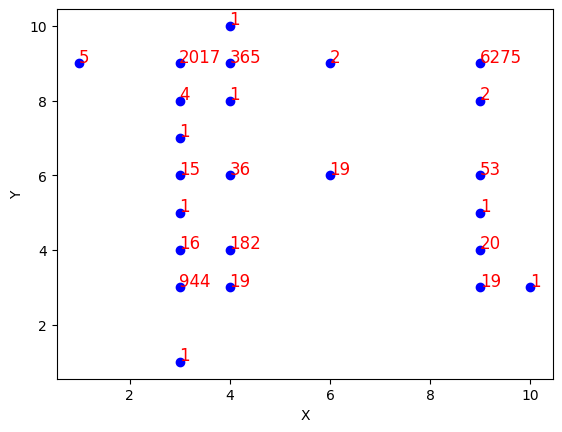

0.742

In [384]:
xs = []
ys = []
for i in range(10000):
    im = torch.rand((28, 28)) * 2 - 1
    a1 = list(fx(im.view((1, 28, 28)), flist=scs[:3])[0])
    xs.append(a1.index(max(a1)))
    a2 = list(fx(im.view((1, 28, 28)), flist=scs[3:])[0])
    ys.append(a2.index(max(a2)))
plot_with_labels(xs, ys)

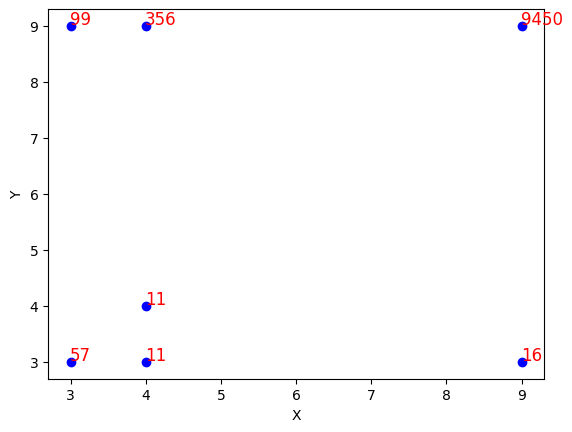

0.9518

In [385]:
xs = []
ys = []
for i in range(10000):
    im = torch.rand((28, 28)) * 2 - 1
    a1 = list(fx(im.view((1, 28, 28)), flist=cnns[:3])[0])
    xs.append(a1.index(max(a1))+1)
    a2 = list(fx(im.view((1, 28, 28)), flist=cnns[3:])[0])
    ys.append(a2.index(max(a2))+1)
plot_with_labels(xs, ys)

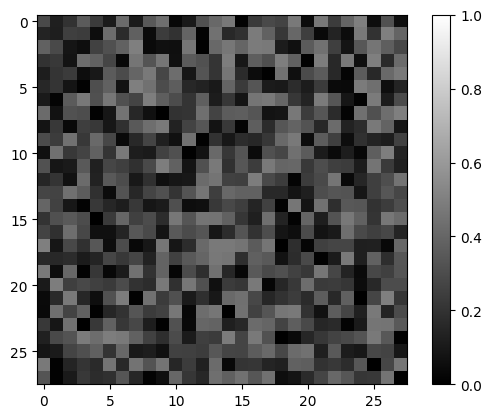

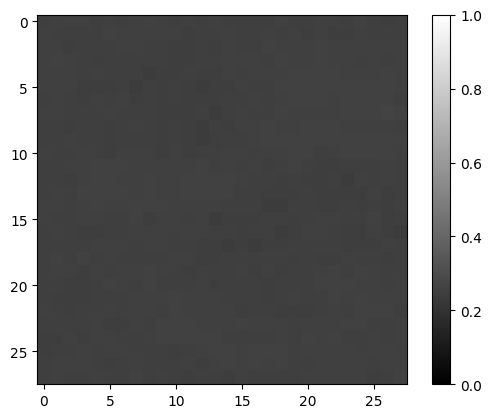

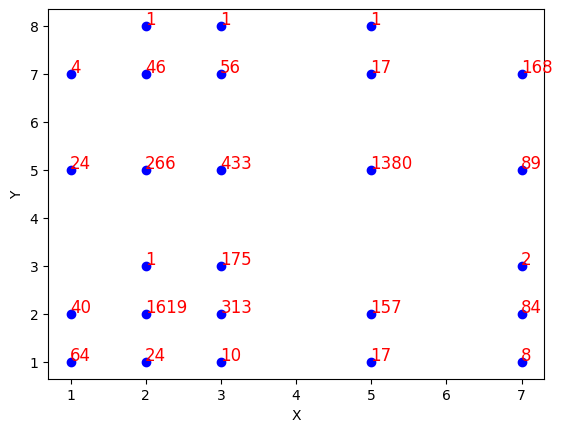

0.6812

In [404]:
xs = []
ys = []
for i in range(5000):
    im = torch.rand((28, 28)) - 1
    if i==0:
        draw_tensor_image(im.view(28, 28))
    a1 = list(fx(im.view((1, 28, 28)), flist=cnns[:3])[0])
    a1 = a1.index(max(a1))
    xs.append(a1)
    a2 = list(fx(im.view((1, 28, 28)), flist=cnns[3:])[0])
    a2 = a2.index(max(a2))
    ys.append(a2)
    if a1 == a2 and a1 == 5:
        image = image + im
        s += 1

draw(image / s)
plot_with_labels(xs, ys)


In [402]:
a1

2

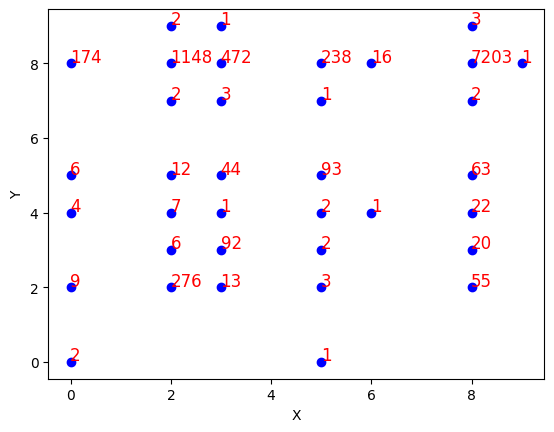

0.7666

In [391]:
xs = []
ys = []
for i in range(10000):
    im = torch.rand((28, 28)) * 2 - 1
    a1 = list(fx(im.view((1, 28, 28)), flist=[scs[1]])[0])
    xs.append(a1.index(max(a1)))
    a2 = list(fx(im.view((1, 28, 28)), flist=[scs[4]])[0])
    ys.append(a2.index(max(a2)))
plot_with_labels(xs, ys)

In [91]:
p = torch.zeros((1, 28, 28))
am = 10
for i in range(am):
    p1 = find_similar(f1, f2, 28 * 28, 10)
    p1 = torch.tensor(p1).view(1, 28, 28)
    p = p + p1
p = p / am

In [324]:
images, labels = data[0], data[1]

xs = []
ys = []

for im in images:
    a1 = list(f3(im)[0])
    xs.append(a1.index(max(a1)))
    a2 = list(f1(im)[0])
    ys.append(a2.index(max(a2)))

plt.scatte(xs, ys, color=(0.2, 0.4, 0.3))

AttributeError: 'int' object has no attribute 'view'

In [115]:
a1

[tensor([ 2.2535, -4.7559,  2.6527, -3.5666,  2.7094,  1.5437, 12.8243, -6.0343,
         -2.4518, -4.3536], grad_fn=<UnbindBackward0>)]

In [121]:
f1(im)[0].size()

torch.Size([10])

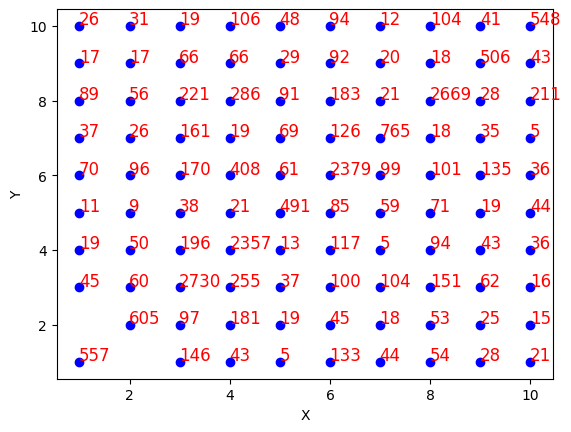

0.68031598420079

In [288]:
from collections import Counter
plot_with_labels(xs, ys)

In [147]:
data = []

In [181]:
for i in range(10000):
    image = torch.rand((28, 28)) * 2 - 1
    l = list(f3(image)[0])
    label = l.index(max(l))
    data.append((image, label))
    if i % 100 == 0:
        print(f'{i // 100}%')

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


In [380]:
def guess(f, im):
    if isinstance(f, CNNet) or isinstance(f, SCNNet):
        im = im.viev((1, 28, 28))
    a = list(f(im)[0])
    return a.index(max(a))+1

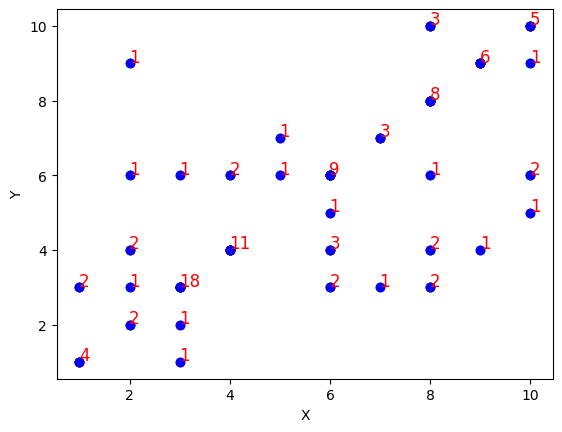

In [342]:
xs = []
ys = []
for i in range(100):
    im = torch.rand((28, 28)) * 2 - 1
    answers = [guess(cnns[i], im) for i in range(len(cnns))]
    if len(set(answers)) == 1 and answers[0] != 9:
        print(answers[0])
        draw_tensor_image(im.view((28, 28)))
        #break
    # a1 = list(saraban(im)[0])
    # xs.append(a1.index(max(a1))+1)
    xs.append(guess(saraban, im))
    a2 = list(net(im)[0])
    ys.append(a2.index(max(a2))+1)
plt.scatter(xs, ys, color=(0.2, 0.1, 0.4))
sim = plot_with_labels(xs, ys)

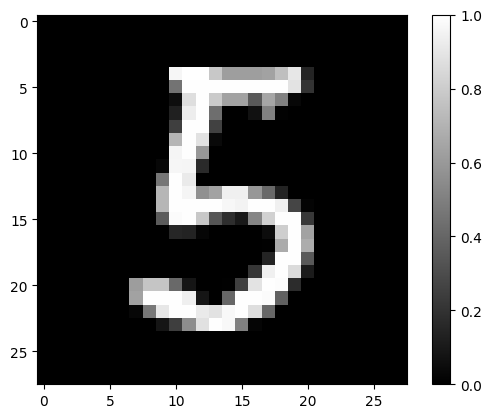

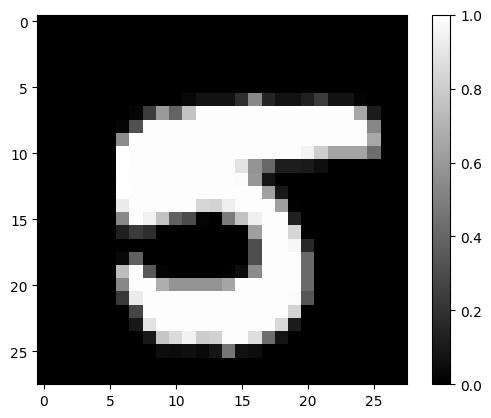

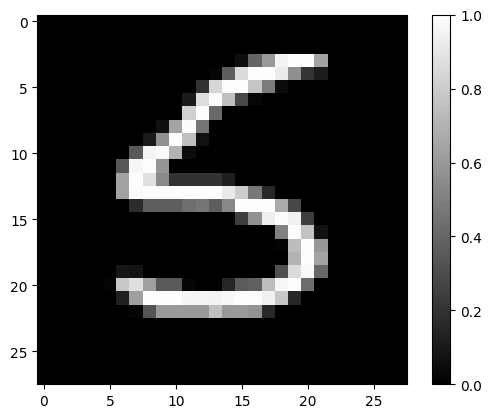

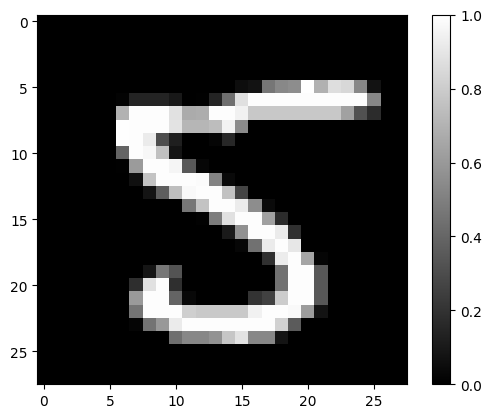

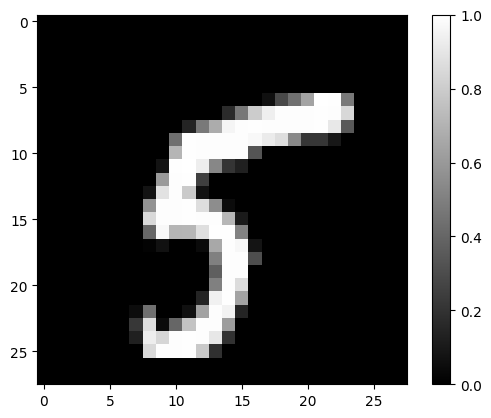

tensor([[-3.0942,  9.6046, -2.7885, -3.7934,  2.8959, -0.8187, -2.6189,  0.5353,
         -0.5307, -0.7580]], grad_fn=<AddmmBackward0>)


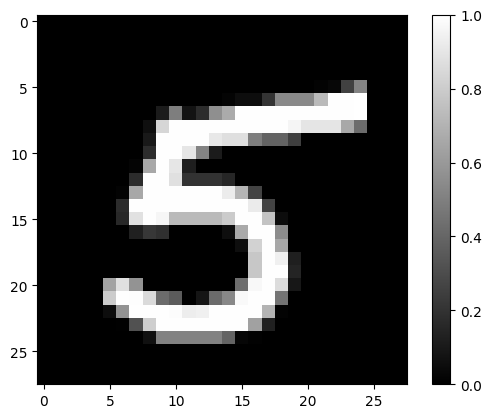

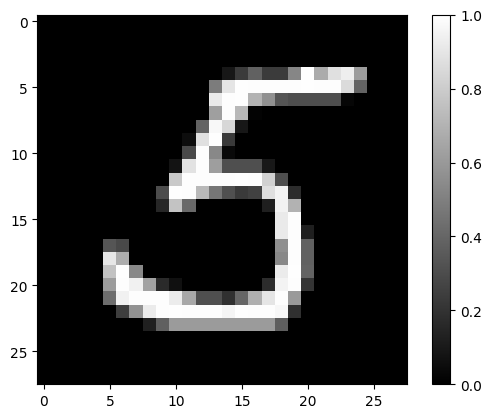

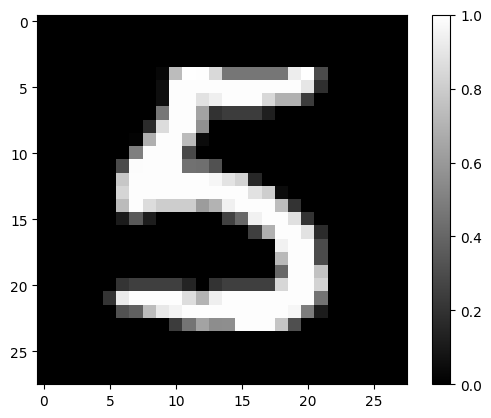

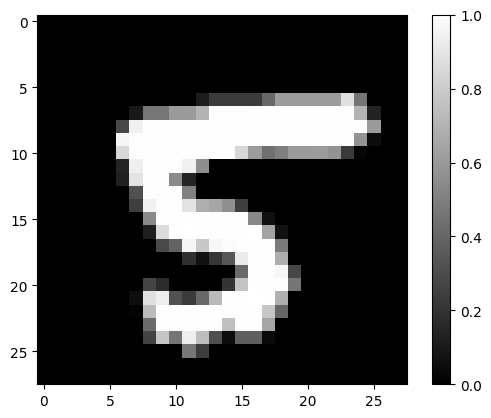

tensor([[-2.7727,  2.5647, 13.2005,  4.5460, -6.9154, -7.3199, -6.3818,  2.2270,
          4.2797, -3.2788]], grad_fn=<AddmmBackward0>)


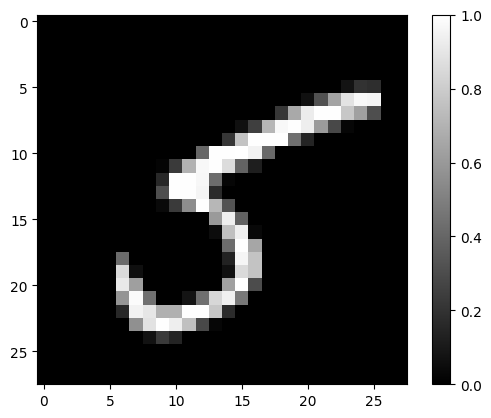

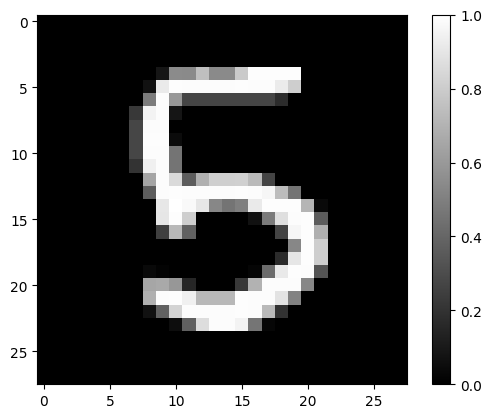

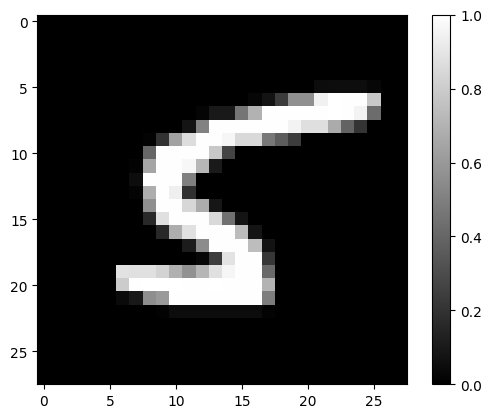

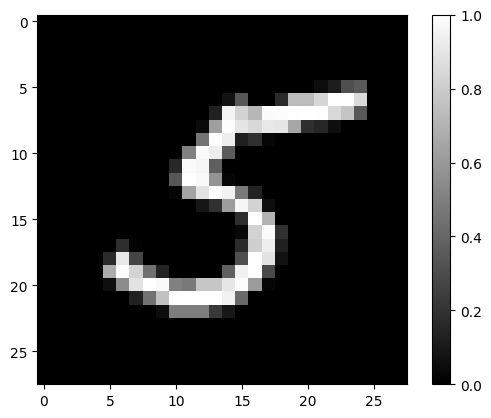

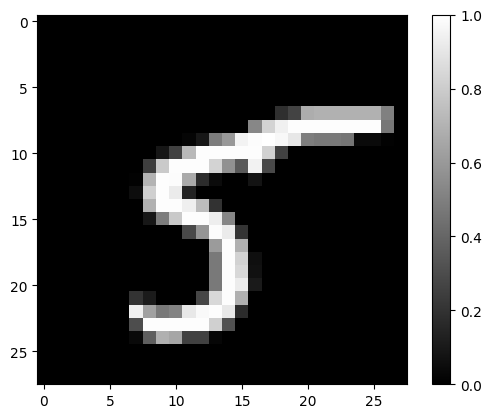

tensor([[-2.0821,  9.5410, -1.4207, -2.9295,  2.7731, -2.4281, -2.6563,  1.5119,
         -1.2654, -1.6947]], grad_fn=<AddmmBackward0>)


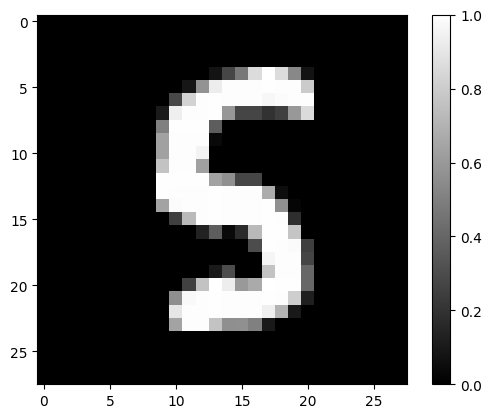

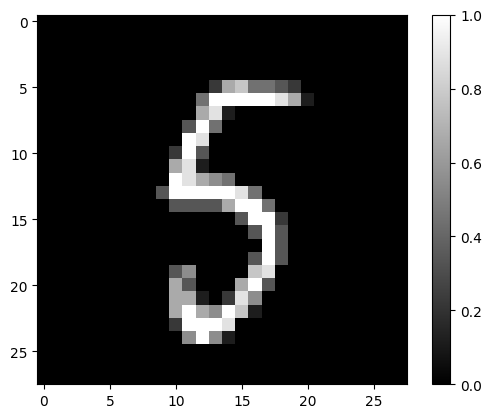

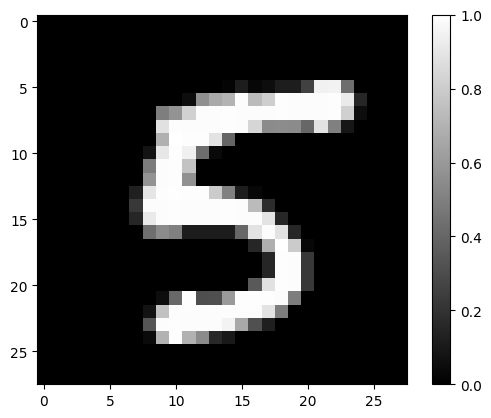

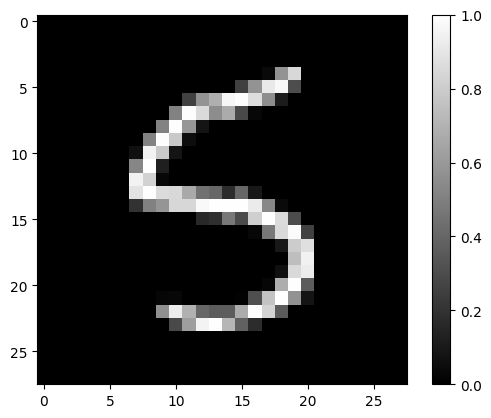

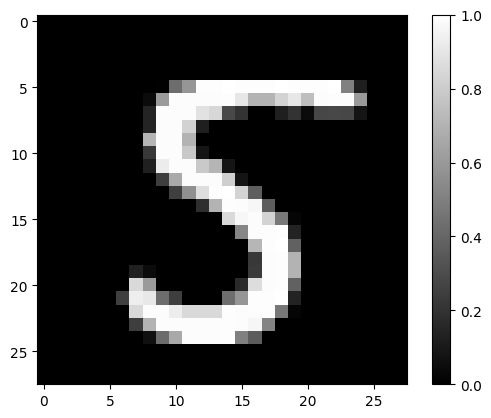

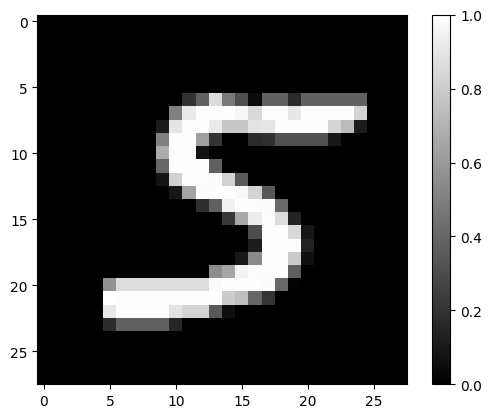

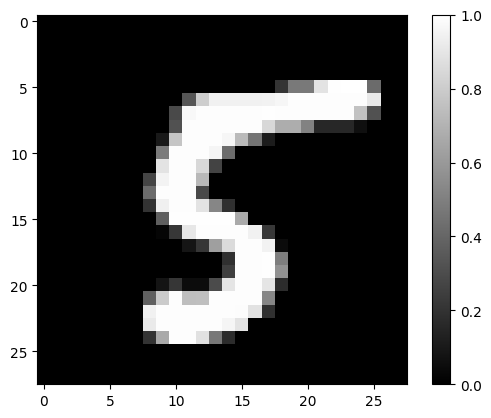

tensor([[ 2.2251, -6.3962, 15.2457,  6.6596, -8.6480, -4.3486, -4.4756,  2.8340,
          1.7846, -2.7280]], grad_fn=<AddmmBackward0>)


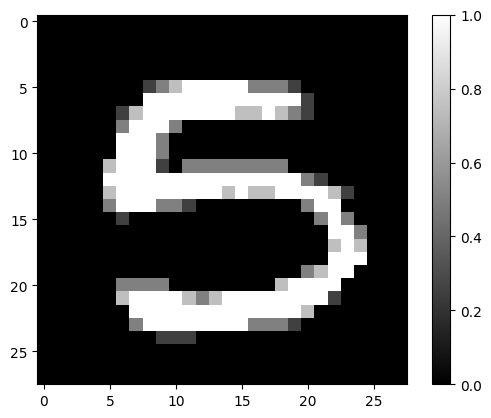

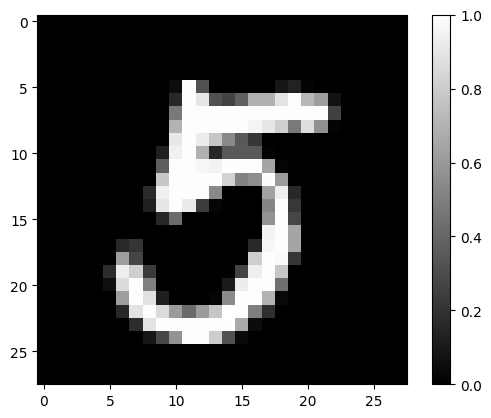

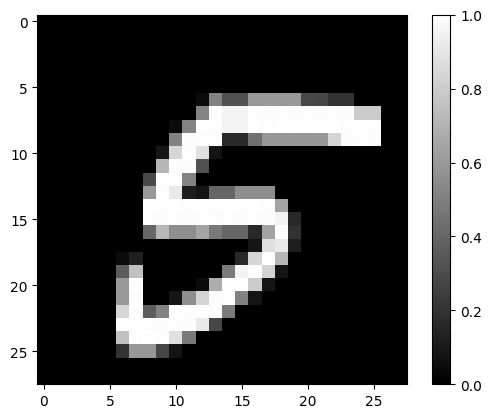

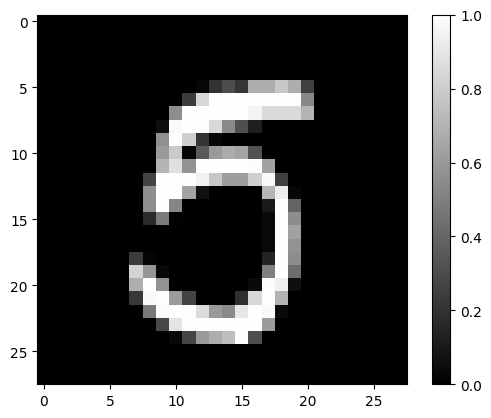

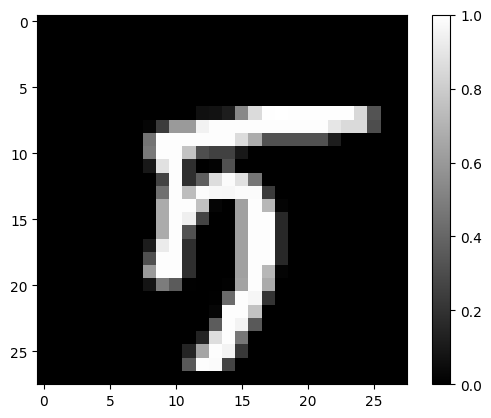

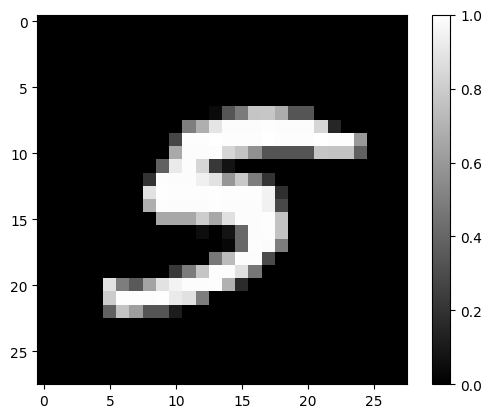

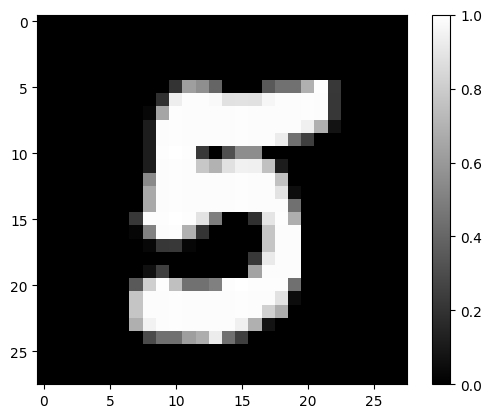

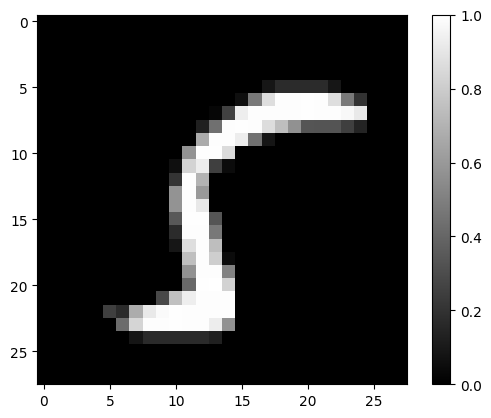

tensor([[-0.4773, -5.6069, -2.3337, -3.3905,  2.3894,  4.5284, 16.1695, -3.4351,
         -0.2884, -6.6317]], grad_fn=<AddmmBackward0>)


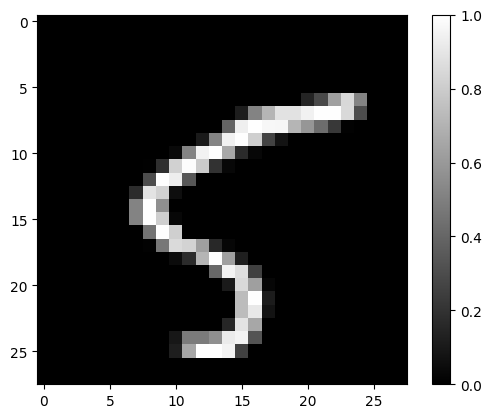

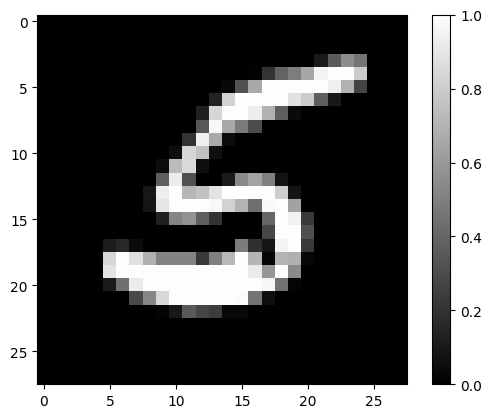

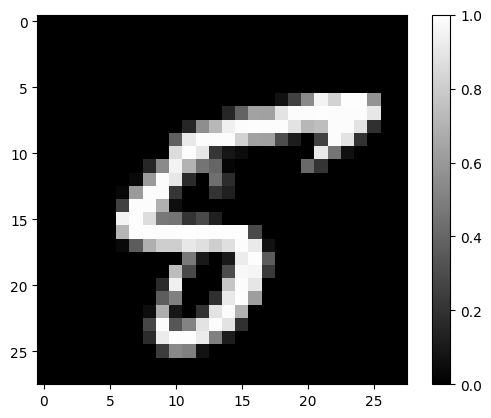

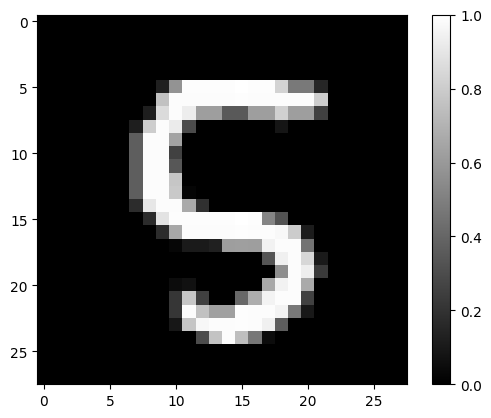

tensor([[ 1.6235, -6.5527, -5.5917, -3.3772, -0.9017,  6.7853,  9.0126,  0.3490,
         -0.1026, -2.2767]], grad_fn=<AddmmBackward0>)


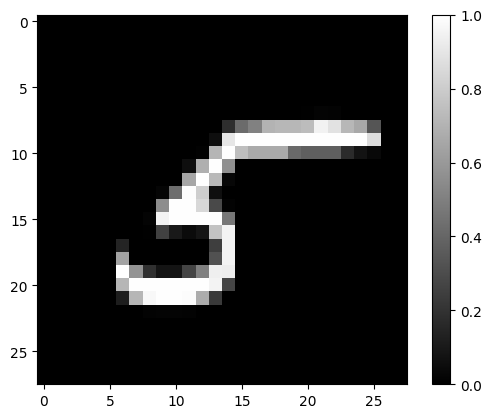

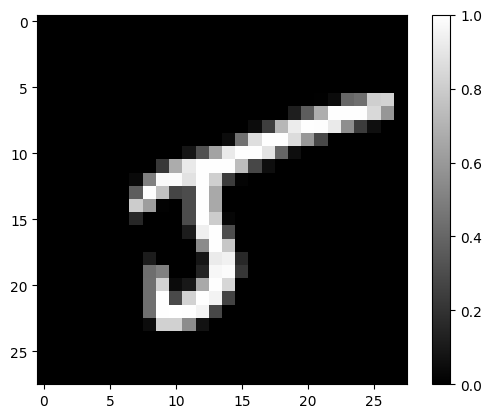

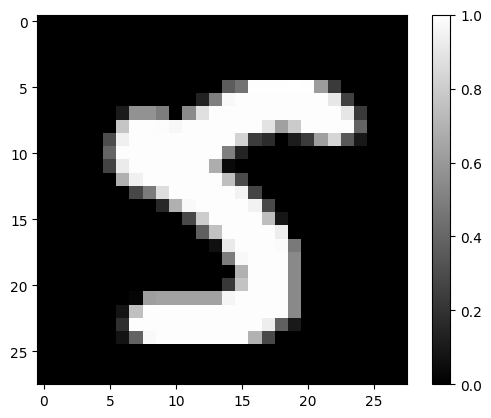

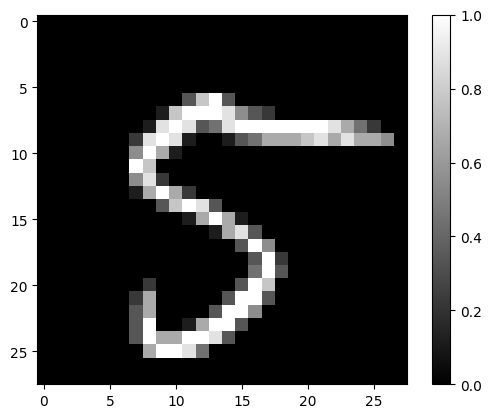

tensor([[ -4.3305,   5.0628,  15.6057,   7.0534,  -8.3990,  -8.2692, -10.7483,
           7.0573,   1.5748,  -4.7478]], grad_fn=<AddmmBackward0>)


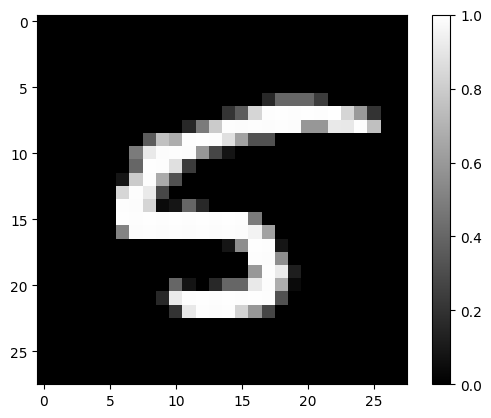

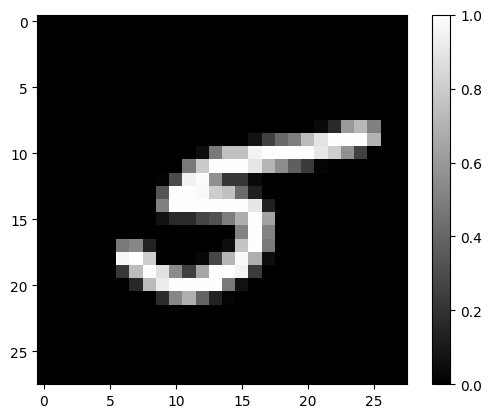

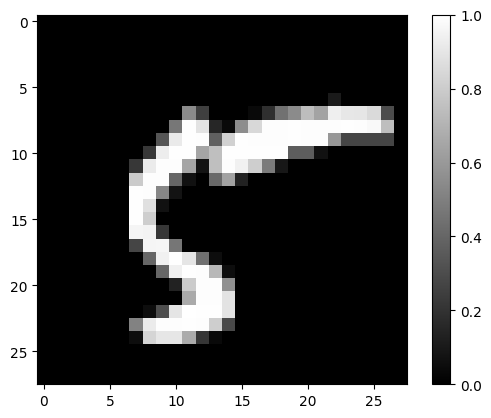

tensor([[ 0.7449,  6.8827, -1.4557, -5.3044,  3.7022, -3.8888, -2.2767,  1.4517,
          2.7909, -1.9462]], grad_fn=<AddmmBackward0>)


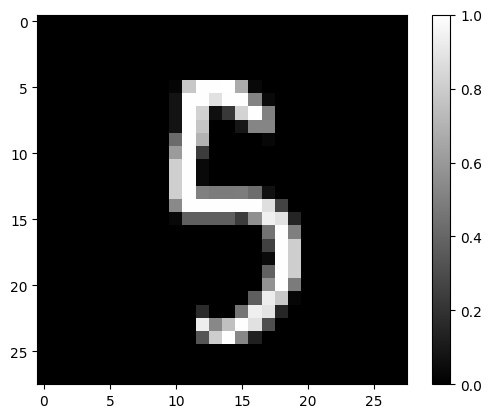

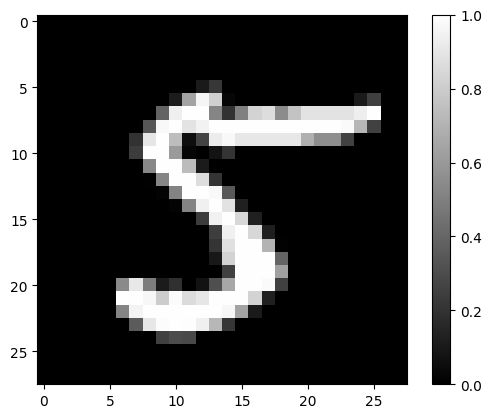

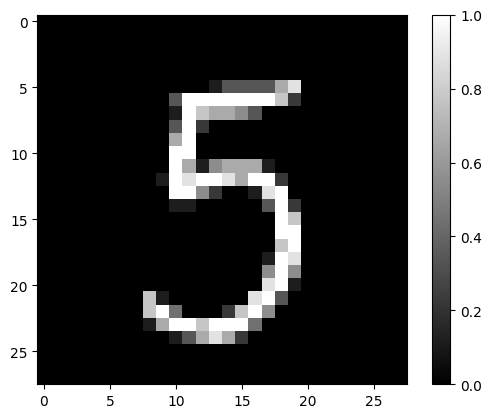

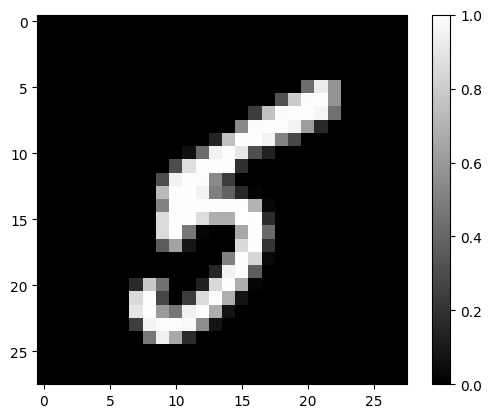

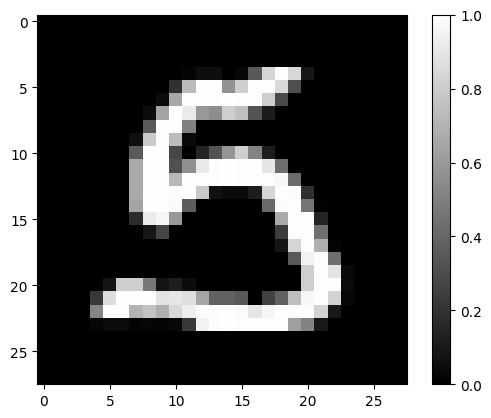

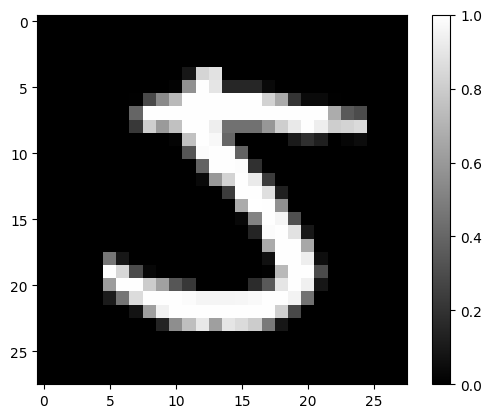

tensor([[-4.5986,  6.7022, -0.2692,  0.3328,  1.2185, -1.4884, -5.7227,  2.1741,
          0.7293, -0.7642]], grad_fn=<AddmmBackward0>)


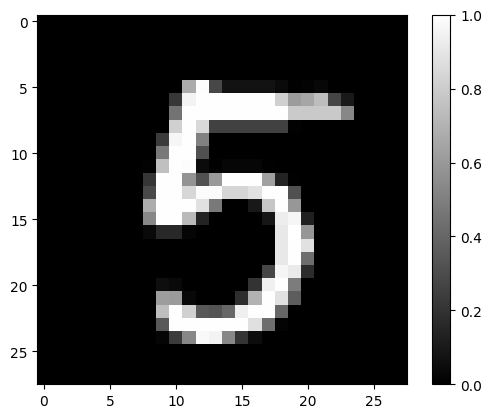

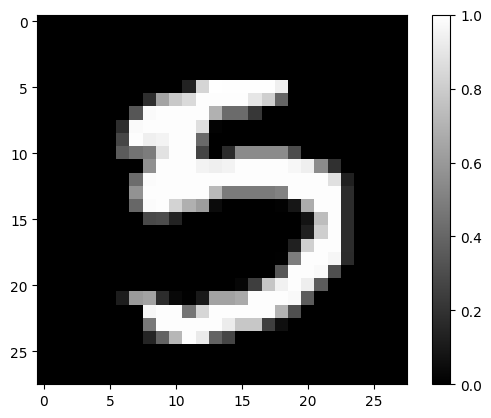

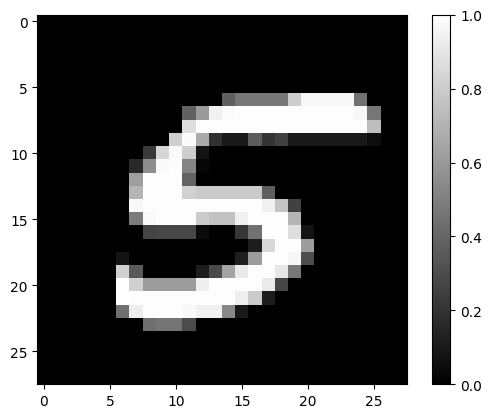

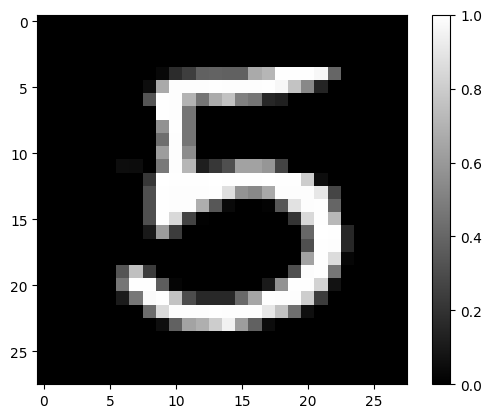

tensor([[ -4.1741,  -1.9204,  -1.2573,   1.9256,   1.4914,  -1.2987, -13.2736,
          16.5968,  -4.5337,   4.4051]], grad_fn=<AddmmBackward0>)


In [392]:
for i, data in enumerate(trainloader, 0):
    if i < 10:
        inputs, labels = data
        for i in range(len(inputs)):
            if int(labels[i]) == 5:
                draw_tensor_image(inputs[i].view((28, 28)))
        print(cnns[0](data[0][0]))

In [355]:
trash_net = Net()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [182]:
trash_trainloader = torch.utils.data.DataLoader(data, batch_size=64)

In [183]:
train(trash_net, epochs=10, trainloader=trash_trainloader)

Epoch 1, Mini-batch 100, Loss: 0.000
Epoch 1, Mini-batch 200, Loss: 0.000
Epoch 1, Mini-batch 300, Loss: 0.000
Epoch 1, Mini-batch 400, Loss: 0.000
Epoch 1, Mini-batch 500, Loss: 0.565
Epoch 1, Mini-batch 600, Loss: 1.698
Epoch 2, Mini-batch 100, Loss: 0.360
Epoch 2, Mini-batch 200, Loss: 0.225
Epoch 2, Mini-batch 300, Loss: 0.164
Epoch 2, Mini-batch 400, Loss: 0.148
Epoch 2, Mini-batch 500, Loss: 0.193
Epoch 2, Mini-batch 600, Loss: 0.392
Epoch 3, Mini-batch 100, Loss: 0.104
Epoch 3, Mini-batch 200, Loss: 0.075
Epoch 3, Mini-batch 300, Loss: 0.061
Epoch 3, Mini-batch 400, Loss: 0.056
Epoch 3, Mini-batch 500, Loss: 0.063
Epoch 3, Mini-batch 600, Loss: 0.117
Epoch 4, Mini-batch 100, Loss: 0.036
Epoch 4, Mini-batch 200, Loss: 0.033
Epoch 4, Mini-batch 300, Loss: 0.030
Epoch 4, Mini-batch 400, Loss: 0.025
Epoch 4, Mini-batch 500, Loss: 0.027
Epoch 4, Mini-batch 600, Loss: 0.032
Epoch 5, Mini-batch 100, Loss: 0.012
Epoch 5, Mini-batch 200, Loss: 0.010
Epoch 5, Mini-batch 300, Loss: 0.010
E

In [184]:
test(trash_net)

Accuracy of the network on the 10000 test images: 90.03%


In [ ]:
trashNet = Net()
testNet = Net()
trashlosses = train(trashNet, epochs=3, trainloader=trash_trainloader)
testlosses = train(testNet, epochs=2)
plt.scatter([i for i in range(len(trashlosses))], trashlosses, color=(0.1, 0.6, 0.4))
plt.scatter([i for i in range(len(testlosses))], testlosses)

In [232]:
net = Net()
bornet = Net()
losses = []
borlosses = []
for i in range(10):
    losses.extend(train(net, epochs=3))
    losses.extend(train(net, epochs=20, trainloader=trash_trainloader))
    borlosses.extend(train(bornet, epochs=3))
    

Epoch 1, Mini-batch 100, Loss: 1.308
Epoch 1, Mini-batch 200, Loss: 0.493
Epoch 1, Mini-batch 300, Loss: 0.371
Epoch 1, Mini-batch 400, Loss: 0.326
Epoch 1, Mini-batch 500, Loss: 0.321
Epoch 1, Mini-batch 600, Loss: 0.284
Epoch 1, Mini-batch 700, Loss: 0.276
Epoch 1, Mini-batch 800, Loss: 0.231
Epoch 1, Mini-batch 900, Loss: 0.239
Epoch 2, Mini-batch 100, Loss: 0.189
Epoch 2, Mini-batch 200, Loss: 0.202
Epoch 2, Mini-batch 300, Loss: 0.206
Epoch 2, Mini-batch 400, Loss: 0.178
Epoch 2, Mini-batch 500, Loss: 0.183
Epoch 2, Mini-batch 600, Loss: 0.169
Epoch 2, Mini-batch 700, Loss: 0.165
Epoch 2, Mini-batch 800, Loss: 0.139
Epoch 2, Mini-batch 900, Loss: 0.167
Epoch 3, Mini-batch 100, Loss: 0.151
Epoch 3, Mini-batch 200, Loss: 0.145
Epoch 3, Mini-batch 300, Loss: 0.127
Epoch 3, Mini-batch 400, Loss: 0.139
Epoch 3, Mini-batch 500, Loss: 0.122
Epoch 3, Mini-batch 600, Loss: 0.119
Epoch 3, Mini-batch 700, Loss: 0.127
Epoch 3, Mini-batch 800, Loss: 0.113
Epoch 3, Mini-batch 900, Loss: 0.115
F

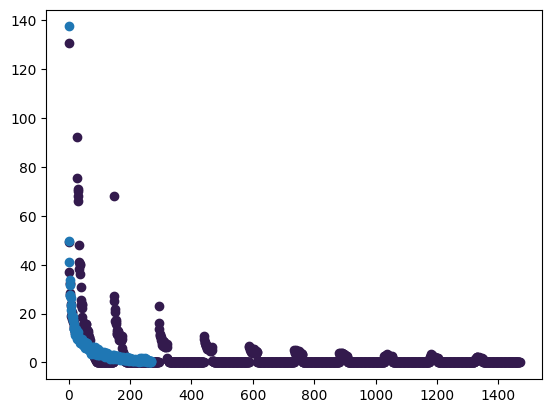

In [233]:
plt.scatter([i for i in range(len(losses))], losses, color=(0.2, 0.1, 0.3))
plt.scatter([i for i in range(len(borlosses))], borlosses)

In [234]:
test(net)

Accuracy of the network on the 10000 test images: 97.38%


In [235]:
test(bornet)

Accuracy of the network on the 10000 test images: 97.63%


In [241]:
snet = SmallNet()
bnet = BigNet()

In [242]:
train(snet, epochs=5)

Epoch 1, Mini-batch 100, Loss: 1.616
Epoch 1, Mini-batch 200, Loss: 0.548
Epoch 1, Mini-batch 300, Loss: 0.442
Epoch 1, Mini-batch 400, Loss: 0.360
Epoch 1, Mini-batch 500, Loss: 0.378
Epoch 1, Mini-batch 600, Loss: 0.311
Epoch 1, Mini-batch 700, Loss: 0.309
Epoch 1, Mini-batch 800, Loss: 0.293
Epoch 1, Mini-batch 900, Loss: 0.284
Epoch 2, Mini-batch 100, Loss: 0.274
Epoch 2, Mini-batch 200, Loss: 0.253
Epoch 2, Mini-batch 300, Loss: 0.245
Epoch 2, Mini-batch 400, Loss: 0.219
Epoch 2, Mini-batch 500, Loss: 0.219
Epoch 2, Mini-batch 600, Loss: 0.230
Epoch 2, Mini-batch 700, Loss: 0.233
Epoch 2, Mini-batch 800, Loss: 0.223
Epoch 2, Mini-batch 900, Loss: 0.203
Epoch 3, Mini-batch 100, Loss: 0.206
Epoch 3, Mini-batch 200, Loss: 0.196
Epoch 3, Mini-batch 300, Loss: 0.179
Epoch 3, Mini-batch 400, Loss: 0.194
Epoch 3, Mini-batch 500, Loss: 0.184
Epoch 3, Mini-batch 600, Loss: 0.194
Epoch 3, Mini-batch 700, Loss: 0.188
Epoch 3, Mini-batch 800, Loss: 0.182
Epoch 3, Mini-batch 900, Loss: 0.169
E

[161.64465200901031,
 54.810363084077835,
 44.19493758678436,
 35.959621861577034,
 37.76796402037144,
 31.148466005921364,
 30.856865257024765,
 29.296180486679077,
 28.4005289375782,
 27.39804770797491,
 25.334516532719135,
 24.492033652961254,
 21.88867260888219,
 21.939865060150623,
 23.030990824103355,
 23.250753972679377,
 22.292234633117914,
 20.349732987582684,
 20.582112163305283,
 19.59950277209282,
 17.869052466005087,
 19.42296728491783,
 18.416060630232096,
 19.405655462294817,
 18.83091207779944,
 18.23165842331946,
 16.88056481257081,
 16.75135226175189,
 16.952115308493376,
 14.624252067878842,
 17.41330004669726,
 16.672042397782207,
 16.769871870055795,
 16.834998970851302,
 17.158788895234466,
 16.16347148269415,
 15.406688716262579,
 14.565566752105951,
 15.171438321471214,
 13.910899935290217,
 14.234306190162897,
 15.068658709526062,
 14.311354395002127,
 13.15644256863743,
 14.192985463887453]

In [246]:
train(bnet, epochs=5)

Epoch 1, Mini-batch 100, Loss: 1.857
Epoch 1, Mini-batch 200, Loss: 0.645
Epoch 1, Mini-batch 300, Loss: 0.430
Epoch 1, Mini-batch 400, Loss: 0.364
Epoch 1, Mini-batch 500, Loss: 0.329
Epoch 1, Mini-batch 600, Loss: 0.297
Epoch 1, Mini-batch 700, Loss: 0.273
Epoch 1, Mini-batch 800, Loss: 0.244
Epoch 1, Mini-batch 900, Loss: 0.250
Epoch 2, Mini-batch 100, Loss: 0.200
Epoch 2, Mini-batch 200, Loss: 0.207
Epoch 2, Mini-batch 300, Loss: 0.178
Epoch 2, Mini-batch 400, Loss: 0.177
Epoch 2, Mini-batch 500, Loss: 0.166
Epoch 2, Mini-batch 600, Loss: 0.173
Epoch 2, Mini-batch 700, Loss: 0.176
Epoch 2, Mini-batch 800, Loss: 0.153
Epoch 2, Mini-batch 900, Loss: 0.164
Epoch 3, Mini-batch 100, Loss: 0.137
Epoch 3, Mini-batch 200, Loss: 0.144
Epoch 3, Mini-batch 300, Loss: 0.135
Epoch 3, Mini-batch 400, Loss: 0.125
Epoch 3, Mini-batch 500, Loss: 0.134
Epoch 3, Mini-batch 600, Loss: 0.121
Epoch 3, Mini-batch 700, Loss: 0.135
Epoch 3, Mini-batch 800, Loss: 0.110
Epoch 3, Mini-batch 900, Loss: 0.121
E

[185.6593691110611,
 64.53388297557831,
 42.997087582945824,
 36.3868753015995,
 32.858960688114166,
 29.70188269764185,
 27.29091452807188,
 24.37818170338869,
 25.021938152611256,
 20.020082615315914,
 20.671013668179512,
 17.80261554196477,
 17.74684042111039,
 16.578320786356926,
 17.263123206794262,
 17.60932083427906,
 15.347420867532492,
 16.439894285053015,
 13.722928778268397,
 14.404372213408351,
 13.450433703139424,
 12.497803046368062,
 13.415823148563504,
 12.093269620090723,
 13.46161767654121,
 11.03201225027442,
 12.072909086942673,
 10.295799683779478,
 10.675443726591766,
 10.897546596825123,
 10.025073658674955,
 10.974968314636499,
 9.746404360048473,
 10.68478643335402,
 9.460294830612838,
 10.84591868892312,
 8.56277270335704,
 8.687713177874684,
 9.200570861808956,
 9.676405037753284,
 8.154336947016418,
 8.435500060208142,
 7.746750041842461,
 9.009286559652537,
 8.869478872045875]

In [244]:
test(snet)

Accuracy of the network on the 10000 test images: 95.6%


In [247]:
test(bnet)

Accuracy of the network on the 10000 test images: 95.87%


In [253]:
trash_trainloader = torch.utils.data.DataLoader(data, batch_size=64)

In [261]:
saraban = SmallNet()
train(saraban, epochs=30, trainloader=trash_trainloader)

Epoch 1, Mini-batch 100, Loss: 2.163
Epoch 1, Mini-batch 200, Loss: 2.067
Epoch 1, Mini-batch 300, Loss: 1.966
Epoch 1, Mini-batch 400, Loss: 1.721
Epoch 1, Mini-batch 500, Loss: 1.512
Epoch 1, Mini-batch 600, Loss: 1.312
Epoch 2, Mini-batch 100, Loss: 1.192
Epoch 2, Mini-batch 200, Loss: 1.128
Epoch 2, Mini-batch 300, Loss: 1.079
Epoch 2, Mini-batch 400, Loss: 0.980
Epoch 2, Mini-batch 500, Loss: 0.952
Epoch 2, Mini-batch 600, Loss: 0.882
Epoch 3, Mini-batch 100, Loss: 0.792
Epoch 3, Mini-batch 200, Loss: 0.784
Epoch 3, Mini-batch 300, Loss: 0.751
Epoch 3, Mini-batch 400, Loss: 0.704
Epoch 3, Mini-batch 500, Loss: 0.738
Epoch 3, Mini-batch 600, Loss: 0.704
Epoch 4, Mini-batch 100, Loss: 0.639
Epoch 4, Mini-batch 200, Loss: 0.644
Epoch 4, Mini-batch 300, Loss: 0.633
Epoch 4, Mini-batch 400, Loss: 0.596
Epoch 4, Mini-batch 500, Loss: 0.637
Epoch 4, Mini-batch 600, Loss: 0.611
Epoch 5, Mini-batch 100, Loss: 0.558
Epoch 5, Mini-batch 200, Loss: 0.563
Epoch 5, Mini-batch 300, Loss: 0.553
E

[216.30042219161987,
 206.73162865638733,
 196.64346194267273,
 172.1455603837967,
 151.23241674900055,
 131.22708880901337,
 119.16009396314621,
 112.78403627872467,
 107.9232349395752,
 98.04909545183182,
 95.20260214805603,
 88.23719674348831,
 79.17208927869797,
 78.36003088951111,
 75.14174091815948,
 70.40847858786583,
 73.80400168895721,
 70.41391858458519,
 63.88210400938988,
 64.37872409820557,
 63.25572258234024,
 59.56021025776863,
 63.7472118139267,
 61.13176980614662,
 55.76436257362366,
 56.3282068669796,
 55.340250968933105,
 52.874787628650665,
 57.04220852255821,
 54.66219076514244,
 50.527439177036285,
 50.75005507469177,
 49.84010963141918,
 48.21001374721527,
 51.92409971356392,
 49.668042838573456,
 46.297548338770866,
 46.69217033684254,
 46.24854938685894,
 44.32284565269947,
 47.8975068628788,
 45.647713363170624,
 42.828591018915176,
 43.027945667505264,
 42.960927814245224,
 41.00359188020229,
 44.19111129641533,
 42.47001875936985,
 40.20274639129639,
 39.876

In [262]:
test(saraban)

Accuracy of the network on the 10000 test images: 90.85%


In [260]:
test(f3)

Accuracy of the network on the 10000 test images: 97.3%


In [267]:
test(taraban)

Accuracy of the network on the 10000 test images: 90.26%
